In [1]:
!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc
!pip install qiskit_ibm_runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=7f901d45e6bb9d33b7d0b714c6d2560e33c4d3e39ce72651d2242a4ae6269ea5
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

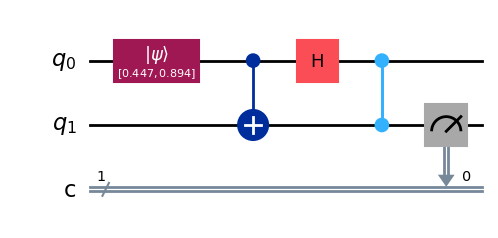

In [6]:
from qiskit import QuantumCircuit
from qiskit import quantum_info as qi
import numpy as np
qc =  QuantumCircuit(2,1)

sv = qi.Statevector([np.sqrt(0.2),np.sqrt(0.8)])
qc.initialize(sv,0)
qc.cx(0,1)
qc.h(0)
qc.cz(0,1)
qc.measure(1,0)
qc.draw('mpl')

In [8]:
# PUBs on aer Simulator
from qiskit import transpile
from qiskit_ibm_runtime import SamplerV2
from qiskit_aer import AerSimulator

aer_simulator = AerSimulator()

sampler_aer = SamplerV2(mode = aer_simulator)

qc_tr = transpile(qc, backend = aer_simulator)

job_aer = sampler_aer.run([(qc_tr,None,100),(qc_tr,None,1000)]) #PUB = (circuit, paramters, shots)

In [9]:
results_aer = job_aer.result()
counts_100 = results_aer[0].data.c.get_counts()

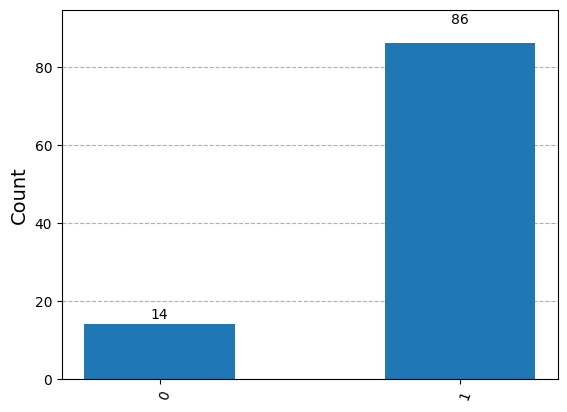

In [10]:
from qiskit.visualization import plot_histogram, plot_distribution

plot_histogram(counts_100)

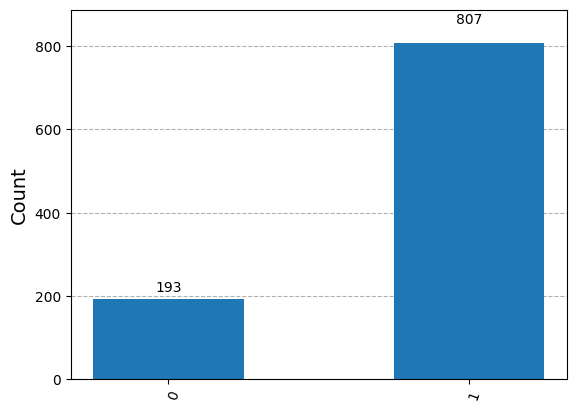

In [11]:
counts_1000 = results_aer[1].data.c.get_counts()
plot_histogram(counts_1000)

In [12]:
# PUBs on IBM quantum computers
from qiskit_ibm_runtime import SamplerV2, QiskitRuntimeService

ibm_service = QiskitRuntimeService(channel = "ibm_quantum", token = "efd9e23135a46ce75fb01f5c280d95156b5c257cd71135ab8eb9be148a5995bf025361f80560ce463e686a7890095e318bbf6d894e1c4db973786b7d102d6d4d")

In [13]:
ibm_qcomp = ibm_service.backend("ibm_kyiv")
sampler_ibm = SamplerV2(mode=ibm_qcomp)

In [14]:
qc_tr_ibm = transpile(qc, backend = ibm_qcomp)

job_ibm = sampler_ibm.run([(qc_tr_ibm,None,100),(qc_tr_ibm,None,1000)]) #PUB = (circuit, paramters, shots)


In [15]:
print(job_ibm.job_id())

cym9npy01rbg008gfe2g


In [18]:
job_id = "cym9npy01rbg008gfe2g"
job_ibm = ibm_service.job(job_id)

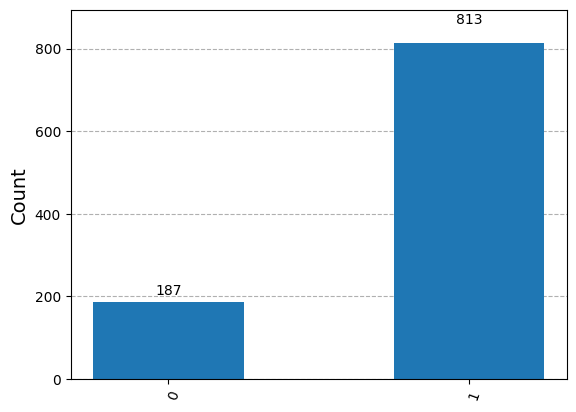

In [20]:
results_ibm = job_ibm.result()
counts_ibm = results_ibm[1].data.c.get_counts()
plot_histogram(counts_ibm)

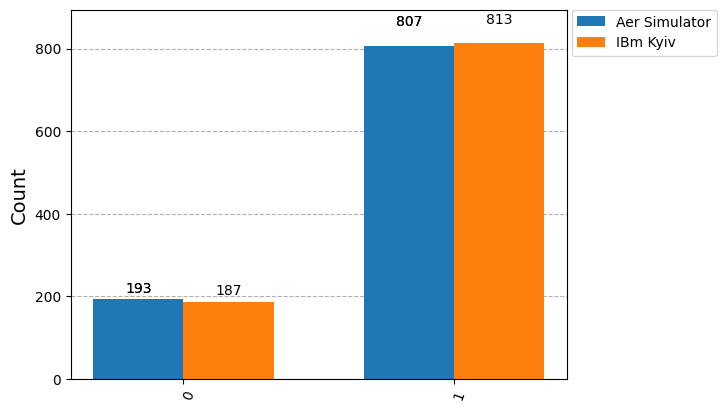

In [22]:
plot_histogram([counts_1000,counts_ibm], legend = ["Aer Simulator", "IBm Kyiv"])

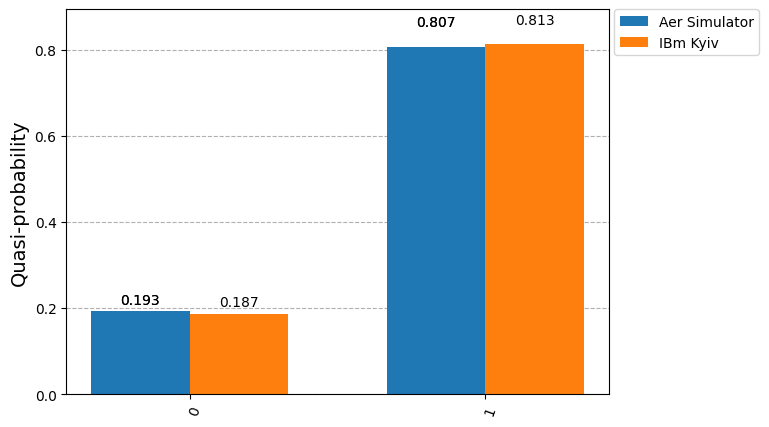

In [23]:
plot_distribution([counts_1000,counts_ibm], legend = ["Aer Simulator", "IBm Kyiv"])